In [201]:
! pip install altair

# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib


## Pytorch Libraries to be imported


# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [202]:
testing_set = pd.read_csv('../datasets/unsw-nb15/UNSW_NB15_testing-set.csv')
training_set = pd.read_csv('../datasets/unsw-nb15/UNSW_NB15_training-set.csv')
LIST_EVENTS = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv')
NB15_1 = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_4.csv')
NB15_features = pd.read_csv('../datasets/unsw-nb15/UNSW-NB15_features.csv', encoding='cp1252')



In [203]:
testing_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [204]:
training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [205]:
LIST_EVENTS.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [206]:
NB15_1.head()

,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0.1,dns,500473.9375,621800.9375,2,2.1,0.2,0.3,0.4,0.5,66,82,0.6,0.7,0.8,0.9,1421927414,1421927414.1,0.017,0.013,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,29,0,0,-,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0


In [207]:
NB15_2.head()

,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,29,7,30,-,458245.4375,6571546.5,72,72.1,255,255.1,1003293149,1003585034,59,844,0,0.1,62.04531,61.899776,1421955842,1421955842.1,1.02269,0.997042,0.002317,0.002173,0.000144,0.2,0.3,0.4,0.5,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,29,7,39,-,2.824127e+05,4.971776e+06,90,92,255,255,3152877672,1047439924,57,990,0,0,98.166675,97.062913,1421955842,1421955842,1.624562,1.587374,0.000665,0.000497,0.000168,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,29,11,15,ftp,1.982998e+05,2.530769e+05,52,54,255,255,3208685093,3215278370,56,69,0,0,194.564141,4.796288,1421955842,1421955842,2.314660,2.149906,0.002342,0.002151,0.000191,0,0,0.0,1.0,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,29,0,0,-,5.922921e+05,7.221095e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421955842,1421955842,0.011000,0.009000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,29,4,1,-,1.723701e+06,5.550936e+04,14,6,255,255,1063301791,1113098865,638,53,0,0,245.278645,11.454426,1421955842,1421955842,2.960000,6.054000,0.008268,0.008075,0.000193,0,0,0.0,0.0,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,29,0,0,-,5.068226e+05,6.315789e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1421955842,1421955842,0.010000,0.002000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,8,13,6,5,1,1,1,NaN,0


In [208]:
NB15_3.head()

,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,29,7,33,-,300478.2813,4514398.5,78,80,255,255.1,1818376620,1818657356,58,854,0,0.1,87.137592,85.643619,1424231129,1424231129.1,1.549156,1.50719,0.000644,0.000521,0.000123,0.2,0.3,Unnamed: 37,Unnamed: 38,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,29,4,1,ftp-data,1.019530e+05,3.283254e+03,14,6,255,255,4075447467,3777413974,638,53,0,0,4045.664812,162.187656,1424231129,1424231129,50.044153,129.990797,0.000616,0.000495,0.000121,0,0,NaN,NaN,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,29,6,6,-,2.074185e+06,2.367920e+06,24,24,255,255,1638377249,1638673555,90,103,0,0,23.013883,0.487342,1424231129,1424231129,0.347545,0.322913,0.000668,0.000544,0.000124,0,0,NaN,NaN,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,29,18,8,smtp,6.040882e+05,5.425646e+04,52,42,255,255,1518379503,3670369209,720,80,0,0,768.061343,24.935787,1424231128,1424231129,9.533961,11.645000,0.016012,0.009132,0.006880,0,0,NaN,NaN,,3,2,3,4,2,1,2,NaN,0


In [209]:
NB15_4.head()

,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1459437.5,130766.8672,52,42,255,255.1,1422136554,3572668484,722,80,0,0.1,456.043567,15.530109,1424250009,1424250009.1,3.943843,4.912488,0.00059,0.000473,0.000117,0.2,0.3,Unnamed: 37,Unnamed: 38,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,2.640454e+04,1.481983e+06,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366423,690.219581,1424250003,1424250009,16.155447,7.871279,0.000771,0.000638,0.000133,0,0,1.0,NaN,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,29,0,0,dns,4.198418e+05,5.118620e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.002000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,5.503374e+06,4.893601e+05,54,42,255,255,4047523379,1903327524,700,80,0,0,65.909688,3.155258,1424250009,1424250009,1.011547,1.302561,0.000674,0.000540,0.000134,0,0,NaN,NaN,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,29,0,0,dns,6.128017e+05,7.471144e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.004000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,29,38,390,-,2.316642e+04,1.013311e+06,446,858,255,255,497111133,526810925,56,1276,0,0,7751.702640,5572.343447,1424250000,1424250009,19.443407,10.084887,0.000654,0.000516,0.000138,0,0,NaN,NaN,,9,7,2,3,2,1,6,NaN,0


In [210]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [211]:
## concat data

In [218]:
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

In [221]:
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)



0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
2540038         NaN
2540039         NaN
2540040         NaN
2540041         NaN
2540042    Exploits
Name: attack_cat, Length: 2540043, dtype: object

In [223]:
train_df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [ ]:


# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:
train_df

In [ ]:
## data analysis and basic pre-processing

In [ ]:
# dimension calc
print("dataset shape: ",train_df.shape)

In [ ]:
# statistical summary of ds
train_df.info()

In [ ]:


# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")



In [ ]:
## Duplicate record check
print("Duplicates in train_df: ",train_df.duplicated().sum())

In [214]:
train_df = train_df.drop_duplicates()

In [215]:
## compute missing values


missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data



,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


In [225]:
# Define threat levels based on attack labels
def map_to_threat_level(attack_category):
    if attack_category == 'normal':
        return 0  # Normal
    elif attack_category in ['generic', 'exploits', 'reconnaissance']:
        return 1  # Low threat
    elif attack_category in ['dos', 'shellcode', 'analysis']:
        return 2  # Medium threat
    else:
        return 3  # High threat

In [247]:
train_df['threat_level'] = train_df['attack_cat'].apply(lambda x: map_to_threat_level(x))


In [249]:
train_df['threat_level'].unique()

array([0, 1, 2, 3])

In [250]:
## handle NaN values


# NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0 
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)



In [251]:
# Performing descriptive analysis


round(train_df.describe().T,2)



,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
sport,2540043.0,10.16,1.00,-10.82,9.80,10.43,10.90,11.09
dsport,2540043.0,5.25,3.44,-11.51,3.97,4.38,8.55,10.53
dur,2540043.0,-5.58,3.09,-11.51,-6.86,-4.14,-3.68,-0.63
sbytes,2540043.0,6.63,1.29,-11.51,5.30,7.29,7.80,8.94
dbytes,2540043.0,3.79,7.73,-11.51,5.18,7.51,8.23,10.52
sttl,2540043.0,31.00,0.00,31.00,31.00,31.00,31.00,31.00
dttl,2540043.0,29.00,0.00,29.00,29.00,29.00,29.00,29.00
sloss,2540043.0,-3.87,6.42,-11.51,-11.51,1.10,1.95,2.83
dloss,2540043.0,-3.58,6.70,-11.51,-11.51,1.39,2.08,3.56


In [252]:
# Descriptive analysis on categorical
train_df.describe(include="O").T

,count,unique,top,freq
Name,,,,
srcip,2540043,43,59.166.0.4,197959
dstip,2540043,47,149.171.126.3,197771
proto,2540043,135,tcp,1495071
state,2540043,16,FIN,1478686
service,2540043,13,-,1246395
attack_cat,2540043,11,normal,2218760


In [253]:
## Checking unique value attributes


cols = train_df.columns

for column in cols:
    print('Unique values of ',column , 'with dtype',train_df[column].dtype, 'have total values',train_df[column].nunique(),'->',  train_df[column].unique())
    print('-'*100)



Unique values of  srcip with dtype object have total values 43 -> ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
----------------------------------------------------------------------------------------------------
Unique values of  sport with dtype float64 have total values 64597 -> [10.36954591 11.06774712 11.03395374 ... 11.08217332 11.07600065
 11.07950831]
--------------------------

In [254]:
## handling ct_ftp
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')
train_df['ct_ftp_cmd'].dtype
train_df['ct_ftp_cmd'].unique()
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

ValueError: invalid literal for int() with base 10: '0.0'

In [ ]:
## handling is_ftp_login


def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

column = 'is_ftp_login'
convert_to_binary(train_df, column)

In [ ]:


#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')

# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)

#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')

# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)


In [ ]:
## EDA

In [ ]:


numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)



In [ ]:


import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [237]:


# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]



In [238]:


for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)



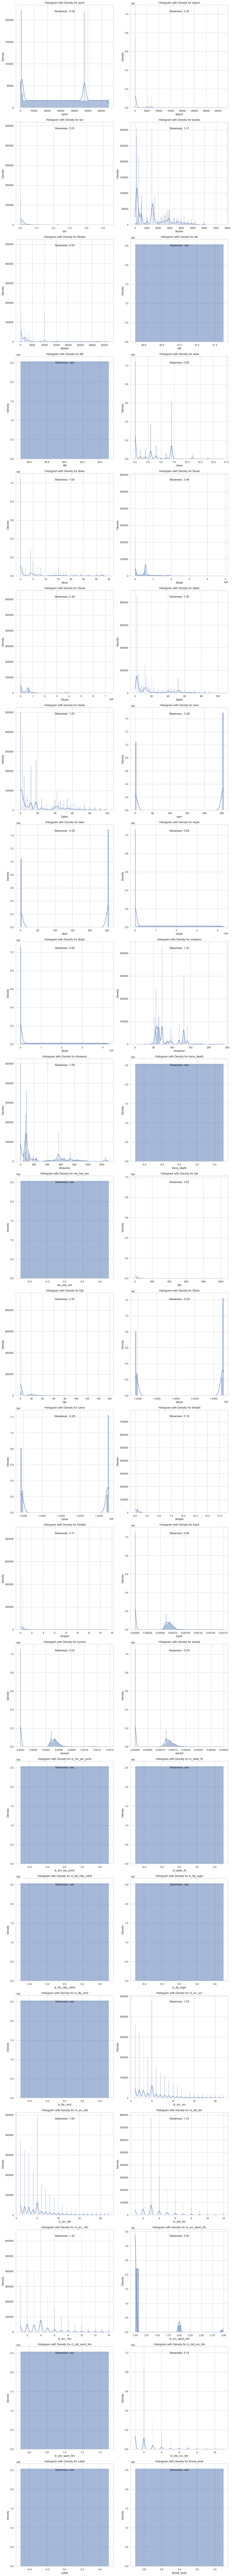

In [239]:


# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



In [240]:


def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed
            
    return X



In [241]:
transform(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,threat_level
0,59.166.0.0,10.369546,149.171.126.9,6.931472,udp,CON,-3.320272,6.269096,5.717028,31.0,29.0,-11.512925,-11.512925,-,11.381404,10.829336,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.882802,4.330733,0.0,0.0,2.291627,2.368630,14.663374,14.663375,1.946626,2.023445,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,0.693152,1.386297,0.693152,1.098616,0.000010,1.0,0.693152,normal,0.0,3
1,59.166.0.6,11.067747,149.171.126.7,3.970292,udp,CON,-6.786423,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.165221,13.363398,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-4.073954,-4.342037,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,2.484907,2.079443,0.000010,0.693152,0.693152,1.0,0.000010,normal,0.0,3
2,59.166.0.5,11.033954,149.171.126.5,3.970292,udp,CON,-6.709724,4.882802,5.099866,31.0,29.0,-11.512925,-11.512925,dns,12.987058,13.204122,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.189655,4.406719,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-3.146323,-4.267984,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,1.791761,2.197226,0.000010,0.000010,0.000010,1.0,0.000010,normal,0.0,3
3,59.166.0.3,9.672249,149.171.126.0,3.970292,udp,CON,-6.743089,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.121508,13.319684,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-5.296319,-5.805815,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,1.945912,2.197226,0.000010,0.000010,0.000010,1.0,0.000010,normal,0.0,3
4,59.166.0.0,10.416790,149.171.126.9,4.709530,udp,CON,-2.546582,6.342121,5.743003,31.0,29.0,-11.512925,-11.512925,-,10.680591,10.081472,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.955827,4.356709,0.0,0.0,3.390549,3.537194,14.663374,14.663375,-0.758706,-0.880046,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,0.693152,1.386297,0.693152,1.098616,0.000010,1.0,0.693152,normal,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.5,10.387178,149.171.126.7,4.382027,tcp,FIN,-2.438222,5.768321,7.510978,31.0,29.0,0.000010,0.693152,ftp-data,10.105026,11.895537,1.791761,2.079443,-10.819778,-10.819778,22.118301,19.219072,3.970292,5.433722,0.0,0.0,2.950988,3.404394,-10.819099,-10.819099,2.856149,2.518112,-7.389022,-7.645900,-8.381789,0.0,0.0,0.0,0.0,0.0,0.000010,0.693152,1.098616,1.098616,0.000010,1.0,1.098616,normal,0.0,3
2540039,59.166.0.7,10.707438,149.171.126.4,3.044523,tcp,CON,-1.007672,6.122493,5.846439,31.0,29.0,0.693152,0.693152,ftp,9.076102,8.753567,2.079443,1.791761,-10.819778,-10.819778,21.148356,19.037864,4.043051,4.060443,0.0,0.0,2.950988,4.860110,-10.819099,-10.819099,-0.758706,-0.880046,-7.387405,-7.627246,-8.347450,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,0.693152,0.693152,0.693152,1.0,0.693152,normal,0.0,3
2540040,59.166.0.3,10.692490,149.171.126.9,3.044523,tcp,CON,-4.143262,7.496652,7.643962,31.0,29.0,1.945912,2.197226,ftp,7.698410,7.843685,3.465736,3.401198,-10.819778,-10.819778,20.024521,20.606624,4.025352,4.248495,0.0,0.0,2.950988,0.975897,1.791763,-10.819099,-0.758706,-0.880046,-7.374564,-7.610953,-8.347450,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,1.386297,0.693152,0.693152,1.0,0.693152,normal,0.0,3
2540041,59.166.0.9,10.312347,149.171.126.0,4.382027,tcp,CON,-4.143262,8.159947,7.506592,31.0,29.0,0.693152,1.386297,http,9.433205

In [242]:
## visualizing class distribution
import matplotlib.pyplot as plt
import seaborn as sns

def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

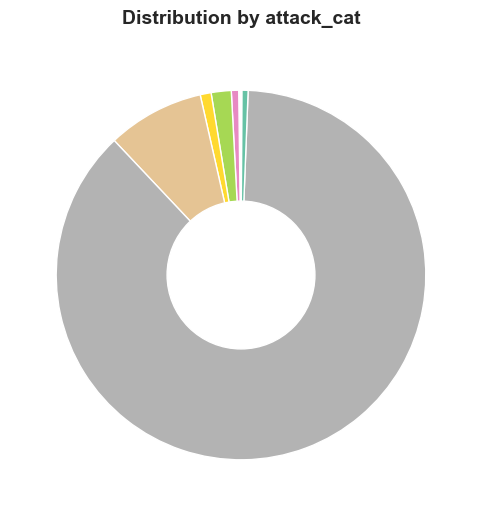

In [243]:
pie_bar_plot(train_df, 'attack_cat')

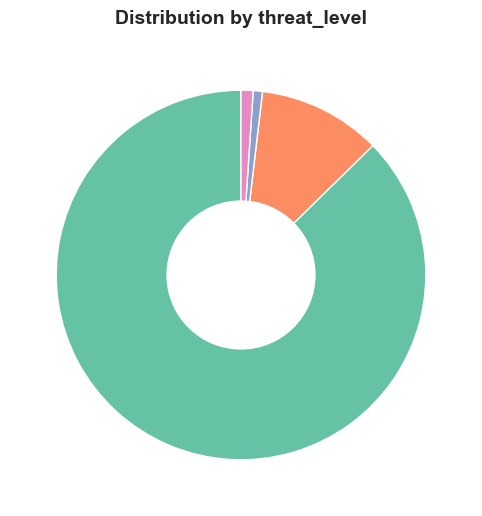

In [255]:
pie_bar_plot(train_df, 'threat_level')

In [256]:


# Print class distribution before resampling
print("Before resampling:", train_df['attack_cat'].value_counts())
print()



Before resampling: attack_cat
normal            2218760
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64



In [257]:
## preprocessing
### feature engineering

def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']
    
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
    
    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
    
    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

In [258]:
generate_features(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,threat_level,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,59.166.0.0,10.369546,149.171.126.9,6.931472,udp,CON,-3.320272,6.269096,5.717028,31.0,29.0,-11.512925,-11.512925,-,11.381404,10.829336,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.882802,4.330733,0.0,0.0,2.291627,2.368630,14.663374,14.663375,1.946626,2.023445,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,0.693152,1.386297,0.693152,1.098616,0.000010,1.0,0.693152,normal,0.0,0,4.283289e-07,0.933314,0.580941,0.962134,0.680285,0.643843,0.625103,11.986124,2.772594,22.210740,4.660257,3.970071,-30.930565,8.690829,7.925498,26.081937,25.650686,3.176876,3.283624,9.213535,0.000000
1,59.166.0.6,11.067747,149.171.126.7,3.970292,udp,CON,-6.786423,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.165221,13.363398,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-4.073954,-4.342037,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,2.484907,2.079443,0.000010,0.693152,0.693152,1.0,0.000010,normal,0.0,0,4.283289e-07,0.806176,0.409386,0.916581,1.095121,1.219003,0.625103,10.165390,1.386304,26.528619,-23.025851,-8.415991,-30.930565,3.454398,3.591765,-151.570206,-153.851802,-7.980209,-7.980209,8.779096,0.000000
2,59.166.0.5,11.033954,149.171.126.5,3.970292,udp,CON,-6.709724,4.882802,5.099866,31.0,29.0,-11.512925,-11.512925,dns,12.987058,13.204122,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.189655,4.406719,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-3.146323,-4.267984,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,1.791761,2.197226,0.000010,0.000010,0.000010,1.0,0.000010,normal,0.0,0,4.283289e-07,0.800477,0.409386,0.914316,1.095121,0.962772,0.625103,9.982668,1.386304,26.191180,-23.025851,-7.414307,-30.930565,3.384525,3.534984,-149.519031,-152.018078,-7.980209,-7.980209,8.596374,0.000000
3,59.166.0.3,9.672249,149.171.126.0,3.970292,udp,CON,-6.743089,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.121508,13.319684,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,14.663374,14.663375,-5.296319,-5.805815,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,1.945912,2.197226,0.000010,0.000010,0.000010,1.0,0.000010,normal,0.0,0,4.283289e-07,0.806176,0.409386,0.916327,1.095121,1.102065,0.625103,10.165390,1.386304,26.441192,-23.025851,-11.102135,-30.930565,3.454398,3.591765,-151.066938,-153.348535,-7.980209,-7.980209,8.779096,0.000000
4,59.166.0.0,10.416790,149.171.126.9,4.709530,udp,CON,-2.546582,6.342121,5.743003,31.0,29.0,-11.512925,-11.512925,-,10.680591,10.081472,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.955827,4.356709,0.0,0.0,3.390549,3.537194,14.663374,14.663375,-0.758706,-0.880046,-11.512925,-11.512925,-7.904714,0.0,0.0,0.0,0.0,0.0,0.693152,1.386297,0.693152,1.098616,0.000010,1.0,0.693152,normal,0.0,0,4.283289e-07,0.940548,0.580941,0.963824,0.747279,-6.324953,0.625103,12.085125,2.772594,20.762063,6.927743,-1.638752,-30.930565,8.792063,7.961507,36.213061,35.660126,4.700307,4.903601,9.312536,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [259]:


# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)



In [260]:


#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns



['ct_ftp_cmd', 'attack_cat']

In [261]:
## target feature encoding


label_encoder = LabelEncoder()
ohe = OneHotEncoder()



In [262]:
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])
train_df['threat_level'] = label_encoder.fit_transform(train_df['threat_level'])

In [263]:


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)



Label Mapping:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}


<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

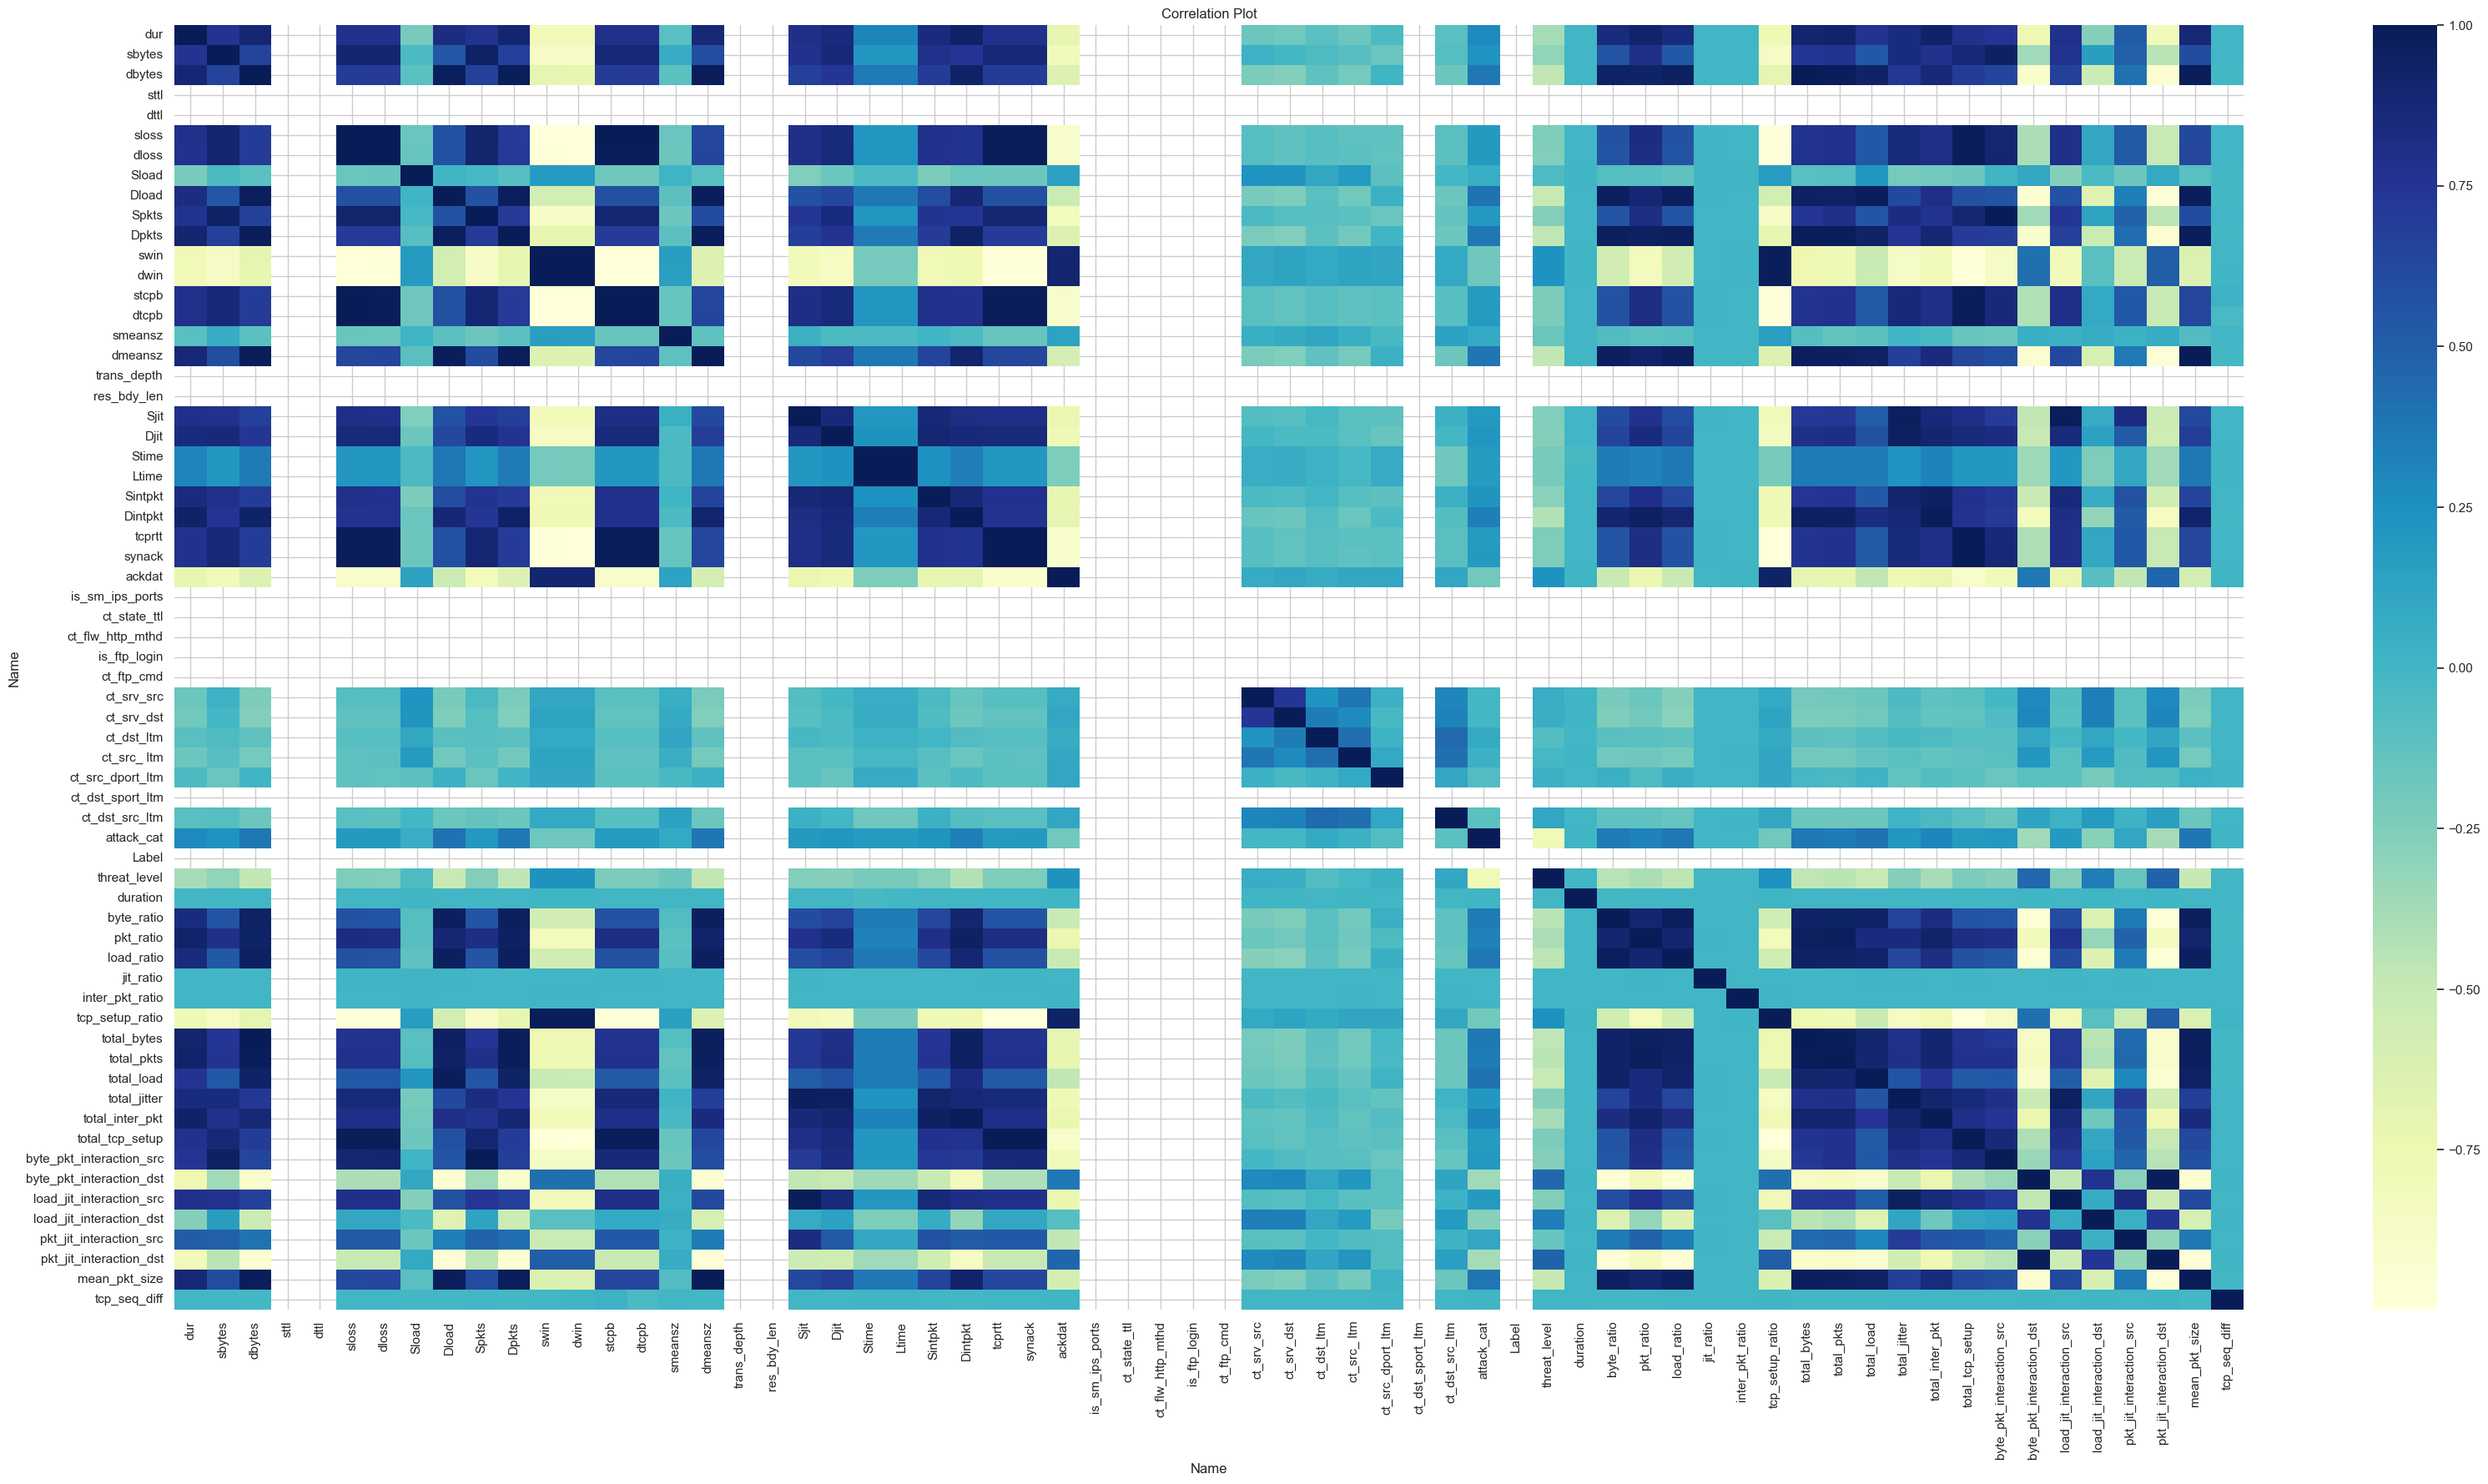

In [264]:
# correlation check


plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')



In [265]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
dur and sbytes
dur and dbytes
dur and sloss
dur and dloss
dur and Dload
dur and Spkts
dur and Dpkts
dur and stcpb
dur and dtcpb
dur and dmeansz
dur and Sjit
dur and Djit
dur and Sintpkt
dur and Dintpkt
dur and tcprtt
dur and synack
dur and byte_ratio
dur and pkt_ratio
dur and load_ratio
dur and total_bytes
dur and total_pkts
dur and total_load
dur and total_jitter
dur and total_inter_pkt
dur and total_tcp_setup
dur and load_jit_interaction_src
dur and mean_pkt_size
sbytes and sloss
sbytes and dloss
sbytes and Spkts
sbytes and stcpb
sbytes and dtcpb
sbytes and Sjit
sbytes and Djit
sbytes and Sintpkt
sbytes and tcprtt
sbytes and synack
sbytes and pkt_ratio
sbytes and total_pkts
sbytes and total_jitter
sbytes and total_inter_pkt
sbytes and total_tcp_setup
sbytes and byte_pkt_interaction_src
sbytes and load_jit_interaction_src
dbytes and Dload
dbytes and Dpkts
dbytes and dmeansz
dbytes and Dintpkt
dbytes and byte_ratio
dbytes and pkt_ratio
dbytes and load_ratio


In [266]:


# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)



Remaining features after dropping highly correlated ones:
Index(['dur', 'sttl', 'dttl', 'Sload', 'swin', 'smeansz', 'trans_depth',
       'res_bdy_len', 'Stime', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label',
       'threat_level', 'duration', 'jit_ratio', 'inter_pkt_ratio',
       'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'pkt_jit_interaction_src', 'tcp_seq_diff'],
      dtype='object', name='Name')


In [286]:
## splitting features in dependent and independent features


x = train_df.drop(['threat_level'], axis=1)
y = train_df[['threat_level']]



In [287]:
## smote to balance imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: threat_level
0               2218760
1                273993
3                 26749
2                 20541
Name: count, dtype: int64

After resampling: threat_level
0               15000
1               15000
2               15000
3               15000
Name: count, dtype: int64


In [288]:
# https://www.kaggle.com/code/getanmolgupta01/unsw-nb15-cybersecurity-threat-detection-ann
# https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7

In [289]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [290]:
! pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /home/caesar/.local/lib/python3.11/site-packages
Requires: imbalanced-learn
Required-by: 


In [291]:


x = x_resampled
y = y_resampled



In [292]:
# feature importance check


discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df



In [293]:


mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores



,Features,Scores
0,attack_cat,1.386298
1,byte_pkt_interaction_src,0.983241
2,smeansz,0.657630
3,byte_pkt_interaction_dst,0.551513
4,Stime,0.521438
5,duration,0.511875
6,inter_pkt_ratio,0.412248
7,dur,0.384350
8,Sload,0.362813
9,pkt_jit_interaction_src,0.330326


In [294]:


# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names



['ct_state_ttl',
 'is_sm_ips_ports',
 'ct_dst_sport_ltm',
 'Label',
 'sttl',
 'trans_depth',
 'res_bdy_len',
 'ct_ftp_cmd',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'dttl']

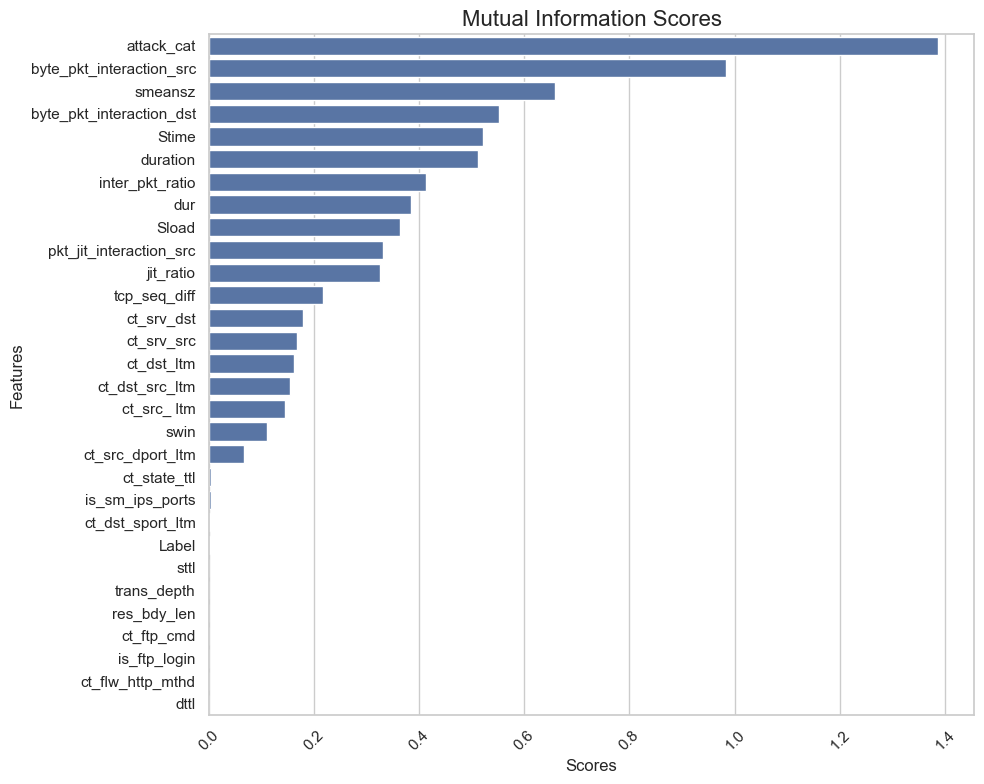

In [295]:


plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()



In [296]:
x.drop(low_score_feature_names,axis=1, inplace = True)

In [297]:
## feature scaling


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

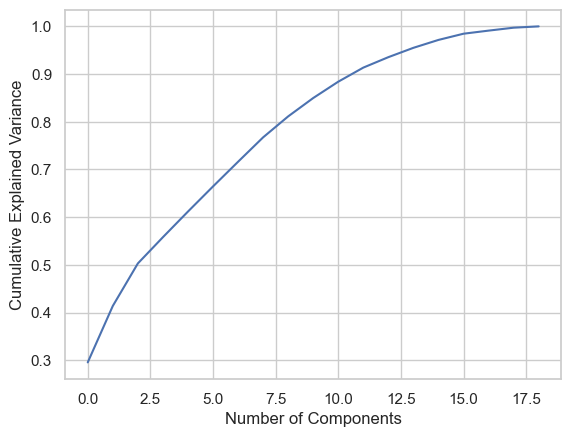

In [298]:
## Checking variance captured by features


pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



In [299]:
# divide train test split
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [300]:
## Baseline model building

In [301]:
## write to filtered dir
import os

filtered_path = "/home/caesar/HoneyIQ/datasets/unsw-nb15/filtered/"
if not os.path.exists(filtered_path):
    os.mkdir(filtered_path)
pd.DataFrame(x_train_scaled).to_csv(filtered_path + "X_train_scaled")

In [302]:
pd.DataFrame(x_test_scaled).to_csv(filtered_path + "X_test_scaled")

In [303]:
pd.DataFrame(y_train).to_csv(filtered_path + "y_train")

In [304]:
pd.DataFrame(y_test).to_csv(filtered_path + "y_test")